In [0]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
drive.CreateFile({'id': '1Kt_vT5FZcqVcZxCe50f-S_QnuHq4-HhJ'}).GetContentFile('WorldBankData.csv')

In [0]:
worldData = pd.read_csv('WorldBankData.csv')

## Pre-lab

## Primary Research Question:
### What model best describes the first decade of internet usage (1990-1999) in the United States? Which model is a better long-term fit?

### What is the first 'Low income' country in the dataset?

In [4]:
worldData[worldData['IncomeGroup'] == 'Low income'].iloc[0]['Country']

'Afghanistan'

In [5]:
worldData.columns

Index(['Country', 'Country.Code', 'year', 'Region', 'IncomeGroup',
       'population', 'rural.population', 'hiv.cases', 'san.access',
       'motor.vehicles', 'gas.price', 'co2.emission', 'mobile.users',
       'internet.users'],
      dtype='object')

### What was the rural population of Aruba in 1970?

In [6]:
worldData.iloc[10]['rural.population']

29164.0

### What is the first year in which Australia had data on the number of mobile device suscriptions?

In [7]:
worldData[(worldData['Country'] == 'Australia') & (worldData['mobile.users'] > 0)].iloc[0]['year']

1987

### Subset of data that only contains information about the United States since 1990.

In [0]:
usa90 = worldData[ (worldData['Country'] == 'United States') & (worldData['year'] > 1989)]

### New variable *time* that represents the number of years elapsed since 1990.

In [9]:
usa90.loc[:,'time'] = worldData['year'] - 1990

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Making new column *internetUsers.mil*, this expresses the number of internet users each year in millions.

In [10]:
usa90.loc[:,'internetUsers.mil'] = usa90['internet.users'] / 1000000

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
usa90.head()

,Country,Country.Code,year,Region,IncomeGroup,population,rural.population,hiv.cases,san.access,motor.vehicles,gas.price,co2.emission,mobile.users,internet.users,time,internetUsers.mil
12644,United States,USA,1990,North America,High income,249623000.0,61656881.0,NaN,248382203.0,NaN,NaN,4768137.761,5181680.0,1958863.0,0,1.958863
12645,United States,USA,1991,North America,High income,252981000.0,61499681.0,NaN,NaN,NaN,NaN,4826703.418,7436741.0,2942659.0,1,2.942659
12646,United States,USA,1992,North America,High income,256514000.0,61358149.0,NaN,NaN,NaN,0.32,4922195.765,10899406.0,4422821.0,2,4.422821
12647,United States,USA,1993,North America,High income,259919000.0,61158941.0,NaN,NaN,NaN,NaN,5029767.210,15864719.0,5904511.0,3,5.904511
12648,United States,USA,1994,North America,High income,263126000.0,60887356.0,NaN,NaN,NaN,NaN,5121559.554,23957416.0,12795240.0,4,12.795240


## Exponential model fit of the number of users per year from 1990 to 1999.

In [0]:
# Getting the subset of the original data for the relevant years (1990 -> 1999)
usa9099 = usa90.iloc[:10,:].copy()

In [0]:
usersPerYear = usa9099['internetUsers.mil'].values
year = usa9099['time'].values

Text(0,0.5,'Log10 of # of internet users in millions')

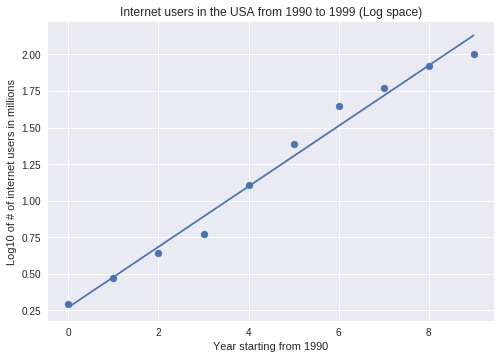

In [14]:
from scipy.stats import linregress

slope, intercept, rvalue, pvalue, stderr = linregress(year, np.log10(usersPerYear))
ypred = slope * year + intercept

plt.scatter(year, np.log10(usersPerYear))
plt.plot(year, ypred)

plt.title('Internet users in the USA from 1990 to 1999 (Log space)')
plt.xlabel('Year starting from 1990')
plt.ylabel('Log10 of # of internet users in millions')

In [15]:
print('b:', 10**slope, 'a:', 10**intercept)

b: 1.6084463152697666 a: 1.8718378474676958


Text(0,0.5,'# of internet users in millions')

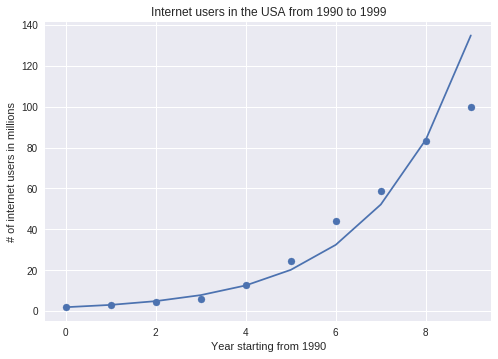

In [16]:
plt.scatter(year, usersPerYear)
plt.plot(year, np.power(10, ypred))

plt.title('Internet users in the USA from 1990 to 1999')
plt.xlabel('Year starting from 1990')
plt.ylabel('# of internet users in millions')

## Logistic model fit

idk why but this is apparently wrong 

In [0]:
from scipy.optimize import curve_fit
truyear = usa9099['year'].values

def func(x, c, a):
  y = c / (1 + a * np.exp(-x))
  return y

popt, pcov = curve_fit(func, year, usersPerYear)

In [0]:
smoother_year = np.linspace(0, year[-1], 100)
ypred_logit = popt[0] / (1 + popt[1] * np.exp(-smoother_year) )

Text(0,0.5,'# of internet users in millions')

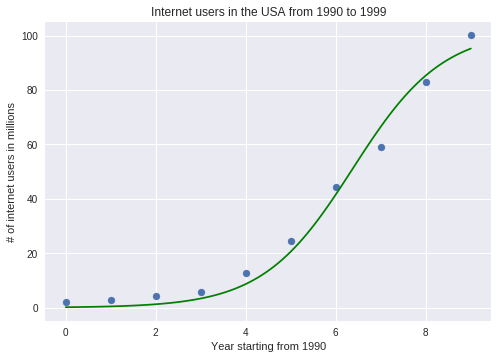

In [19]:
plt.scatter(year, usersPerYear)
plt.plot(smoother_year, ypred_logit, color='green')

plt.title('Internet users in the USA from 1990 to 1999')
plt.xlabel('Year starting from 1990')
plt.ylabel('# of internet users in millions')

## Le True Lab

### Denmark is a high-income country in Europe of about 5.5 million people. What is the best-fitting model for growth of internet usage in Denmark since 1990?  

In [0]:
denmark = worldData[worldData['Country'] == 'Denmark']

In [0]:
denmark90 = denmark[denmark['year'] > 1989]
year = (denmark90['year'] - 1990).values

### Exponential Model

In [0]:
n_users = denmark90['internet.users'].values / 1000000

R2: 0.8041203516218993


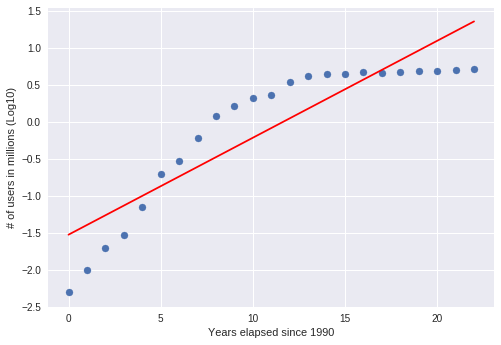

In [59]:
slope, intercept, rvalue, pvalue, stderr = linregress(year, np.log10(n_users))
yDen_expPred = slope * year + intercept

plt.scatter(year, np.log10(n_users))
plt.plot(year, yDen_expPred, color='red')

plt.xlabel('Years elapsed since 1990')
plt.ylabel('# of users in millions (Log10)')

print('R2:', rvalue**2)

### Logistic Model

R2: 0.9771168894809222 
a: 48972.44863934642


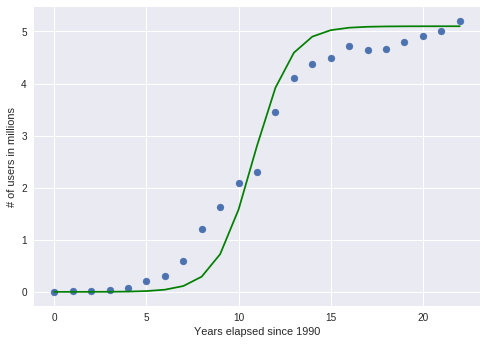

In [75]:
from scipy.stats import pearsonr

def func(x, a):
  y = 5.1 / (1 + a * np.exp(-x))
  return y

params, paramsCov = curve_fit(func, year, n_users)

yDen_logitPred = 5.1 / (1 + params[0] * np.exp(-year))

plt.scatter(year, n_users)
plt.plot(year, yDen_logitPred, color='green')

plt.xlabel('Years elapsed since 1990')
plt.ylabel('# of users in millions')

print('R2:', pearsonr(n_users, yDen_logitPred)[0]**2, '\na:', params[0] )